<a href="https://colab.research.google.com/github/wmhowarth/DataSets-Project2/blob/main/Project2Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

## Part 2

### Author : Warren Howarth

I will choose the Stroke Prediction Dataset as my preferred dataset for this project

### Dictionary

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
# import libraries
import pandas as pd

In [24]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [4]:
# import data
fname = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(fname)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Get a better idea of the
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Firstly we will drop the id column because this is unique and will not help our analysis
df = df.drop(columns = 'id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Delete duplicates
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [10]:
df.duplicated().sum()

0

There are no duplicates

In [11]:
# missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that bmi has 201 missing values

In [13]:
# lets examine them a bit more
missing_vals = df['bmi'].isna()
df[missing_vals]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


These look like valid data entries, and because there is no data to calculate bmi, I am going to impute the mean value of the bmi column for all missing bmi values

In [14]:
# replace missing values with the mean value of the bmi column
mean_val = df['bmi'].mean().round(2)
df['bmi'] = df['bmi'].fillna(mean_val)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
# Look for inconsistencies in the categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [19]:
# Find the unique values in the categorical columns
for i in cat_cols:
  print(f'This is the {i} column')
  print(df[i].value_counts())
  print('\n')

This is the gender column
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


This is the ever_married column
Yes    3353
No     1757
Name: ever_married, dtype: int64


This is the work_type column
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


This is the Residence_type column
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


This is the smoking_status column
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




There are no inconsistencies in the categorical columns

I will rename 'Residence_type' to 'residence_type'

In [20]:
# create a dictionary with 'Old Name:New Name' format
rename_dict = {'Residence_type' : 'residence_type'}
# Now update the columns using .rename(axis=1) for columns
df = df.rename(rename_dict,axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [22]:
# look for incosistencies in the numerical fields
num_cols = df.select_dtypes('number').columns
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [23]:
# age, avg_glucose_level and bmi are the proper numerical fields, hypertension, heart_disease and srtoke are bolean fields
# check that there are no inconsistencies in the bolean fields
bol_fields = ['hypertension', 'heart_disease', 'stroke']
for i in bol_fields:
  print(f'This is the {i} column')
  print(df[i].value_counts())
  print('\n')

This is the hypertension column
0    4612
1     498
Name: hypertension, dtype: int64


This is the heart_disease column
0    4834
1     276
Name: heart_disease, dtype: int64


This is the stroke column
0    4861
1     249
Name: stroke, dtype: int64




There are no inconsistencies in the Boolean fields.
I will however change them to categorical fields for the purpose of plotting the charts

In [25]:
# change the data type of the boolean like fields
df[bol_fields] = df[bol_fields].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


- Univariate Charts

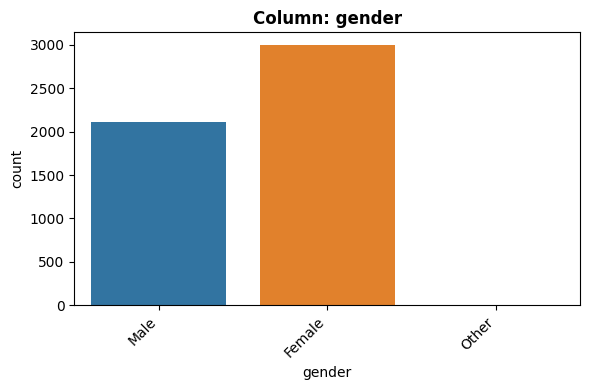

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Female' occurs 2994 times (58.59%)
- Not constant or quasi-constant.


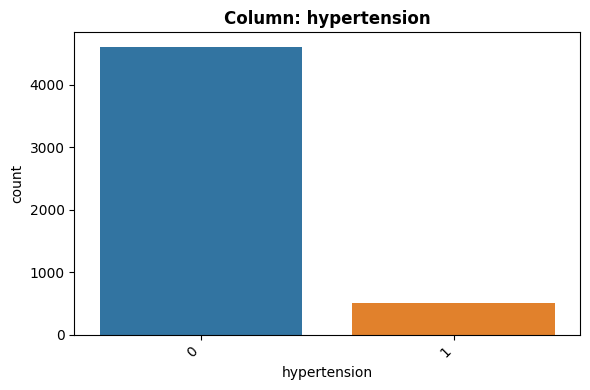

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4612 times (90.25%)
- Not constant or quasi-constant.


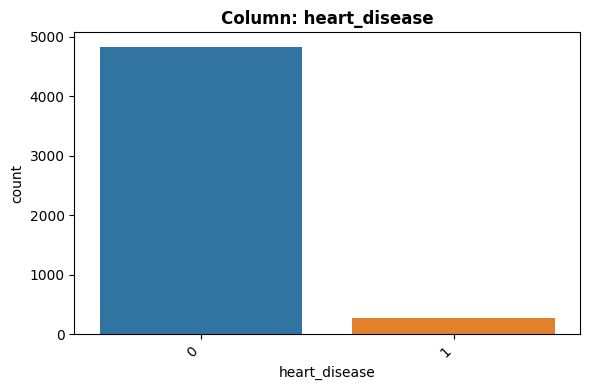

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4834 times (94.6%)
- Not constant or quasi-constant.


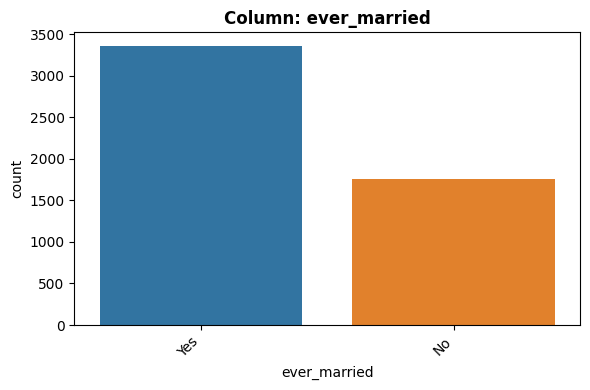

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (65.62%)
- Not constant or quasi-constant.


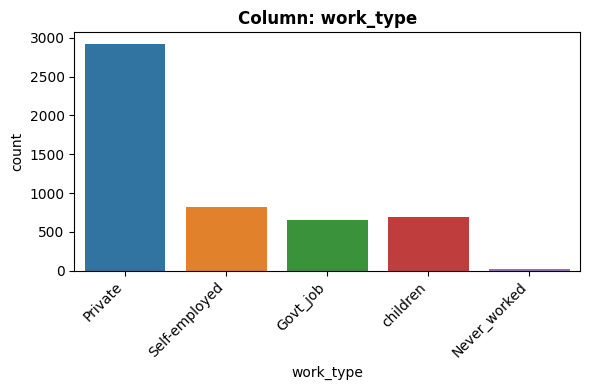

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2925 times (57.24%)
- Not constant or quasi-constant.


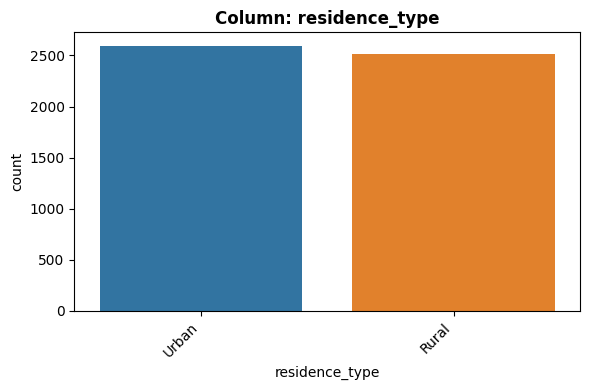

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2596 times (50.8%)
- Not constant or quasi-constant.


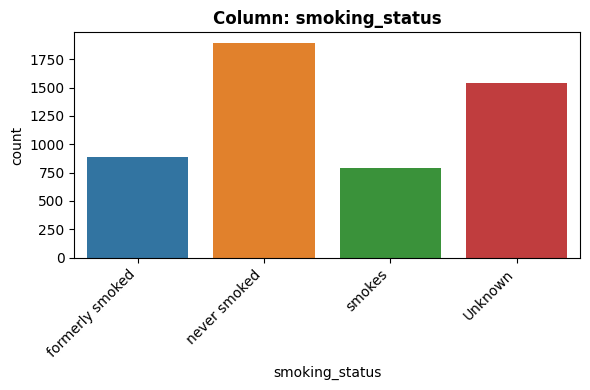

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1892 times (37.03%)
- Not constant or quasi-constant.


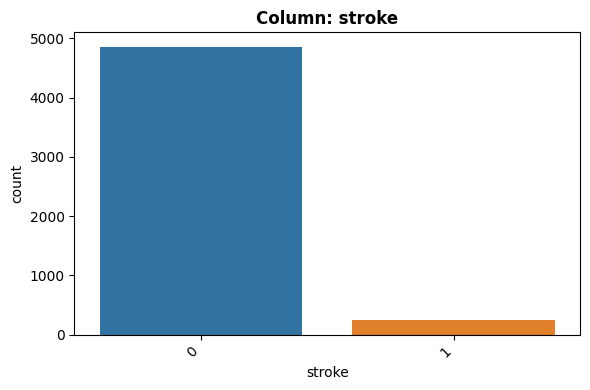

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4861 times (95.13%)
- Not constant or quasi-constant.


In [27]:
cat_cols = df.select_dtypes('object').columns
for i in cat_cols:
  # run the appropriate explore function (based on feature's dtype)
  fig, ax = explore_categorical(df, i)

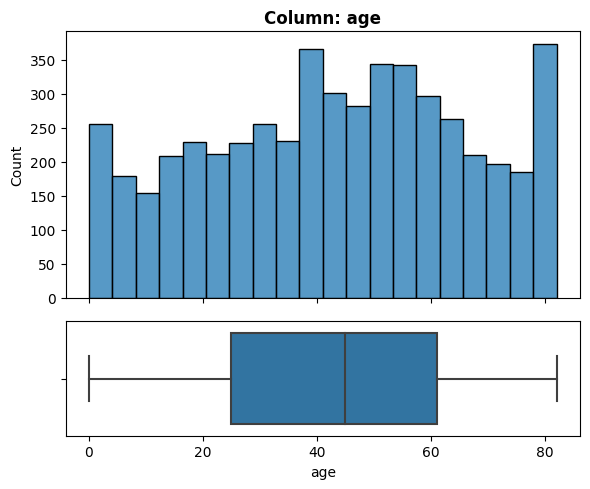

- NaN's Found: 0 (0.0%)
- Unique Values: 104
- Most common value: '78.0' occurs 102 times (2.0%)
- Not constant or quasi-constant.


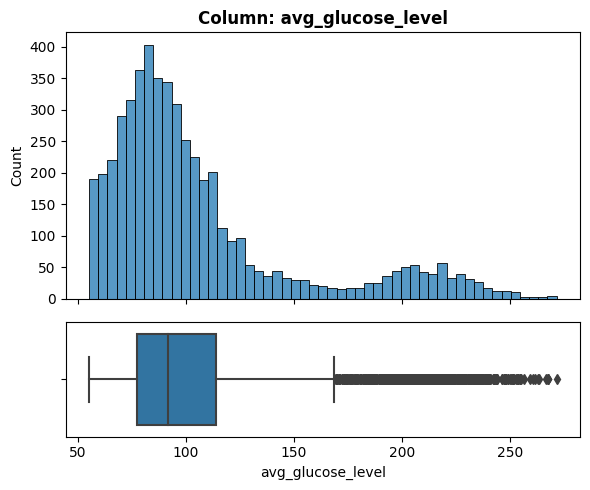

- NaN's Found: 0 (0.0%)
- Unique Values: 3979
- Most common value: '93.88' occurs 6 times (0.12%)
- Not constant or quasi-constant.


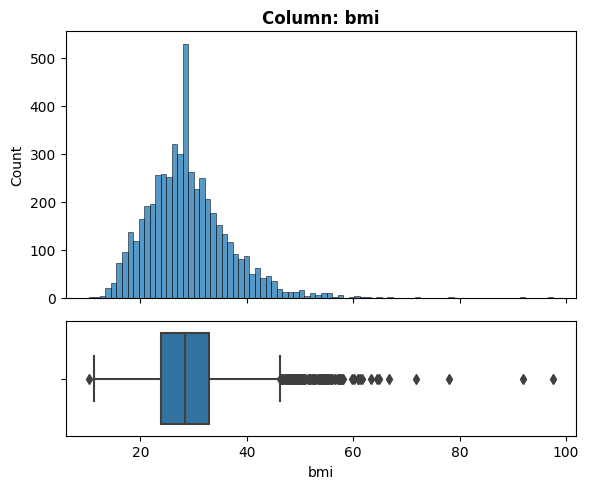

- NaN's Found: 0 (0.0%)
- Unique Values: 419
- Most common value: '28.89' occurs 201 times (3.93%)
- Not constant or quasi-constant.


In [28]:
num_cols = df.select_dtypes('number').columns
for i in num_cols:
  fig, ax = explore_numeric(df, i)

There appear to be outliers in both the avg_glucose_level and the bmi features, but lets take a closer look

In [29]:
# using describe to look for outliers
df.describe().round()

,age,avg_glucose_level,bmi
count,5110.0,5110.0,5110.0
mean,43.0,106.0,29.0
std,23.0,45.0,8.0
min,0.0,55.0,10.0
25%,25.0,77.0,24.0
50%,45.0,92.0,28.0
75%,61.0,114.0,33.0
max,82.0,272.0,98.0


Lets look at the age feature first

In [89]:
# firstly the fractions in the ages are only below 2 years
fraction_age = (df['age'] % 1 != 0) & (df['age'] > 2)
fraction_age.sum()

0

So are they a mistake? What does the work_type 'children' indicate?
That the patients are children, or the patient doesn't work because they are looking after children?

In [90]:
fraction_age = (df['age'] % 1 != 0)
fraction_age.sum()

115

In [91]:
fraction_age = (df['age'] % 1 != 0)
df[fraction_age]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.89,Unknown,1
363,Female,0.64,0,0,No,children,Urban,83.82,24.90,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.50,Unknown,0
562,Female,1.80,0,0,No,children,Urban,58.26,16.50,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.20,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4934,Male,1.32,0,0,No,children,Rural,107.02,28.89,Unknown,0
5032,Female,1.24,0,0,No,children,Rural,61.94,20.30,Unknown,0
5079,Male,1.72,0,0,No,children,Urban,77.28,17.10,Unknown,0
5089,Female,0.72,0,0,No,children,Rural,62.13,16.80,Unknown,0


Of the 115 rows where the age feature is a float value, most of the work_type seems to be 'children'. I can either delete these records completely, or amend the age to the decimal points. I will amend to the decimal points.

In [92]:
df_copy = df.copy()

In [93]:
fraction_age = (df['age'] % 1 != 0)
df.loc[fraction_age,'age'] = df['age'] % 1 * 100

In [94]:
df['age'] = df['age'].astype(int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 439.3+ KB


In [96]:
df.describe().round()

,age,avg_glucose_level,bmi
count,5110.0,5110.0,5110.0
mean,44.0,106.0,29.0
std,22.0,45.0,8.0
min,1.0,55.0,10.0
25%,27.0,77.0,24.0
50%,46.0,92.0,28.0
75%,61.0,114.0,33.0
max,88.0,272.0,98.0


Now lets look at the Glucose level.

The data suggests that there are a number of outliers beyond the 200 odd mark. Lets examine them

In [97]:
glucose = df['avg_glucose_level'] > 200
glucose.sum()

434

There are 434 of them

In [98]:
df[glucose]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
13,Male,78,0,1,Yes,Private,Urban,219.84,28.89,Unknown,1
14,Female,79,0,1,Yes,Private,Urban,214.09,28.20,never smoked,1
17,Male,75,1,0,Yes,Private,Urban,221.29,25.80,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5029,Female,72,0,0,Yes,Private,Urban,206.49,26.30,never smoked,0
5034,Female,79,0,0,No,Private,Urban,253.86,28.80,formerly smoked,0
5035,Female,78,0,0,Yes,Private,Urban,203.36,28.70,formerly smoked,0
5061,Male,41,0,0,Yes,Private,Urban,223.78,32.30,never smoked,0


Lets try above 250

In [100]:
glucose = df['avg_glucose_level'] > 250
glucose.sum()

25

In [101]:
df[glucose]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
33,Male,80,0,1,Yes,Self-employed,Urban,252.72,30.50,formerly smoked,1
122,Male,80,0,0,Yes,Private,Rural,259.63,31.70,smokes,1
135,Female,71,0,0,Yes,Govt_job,Urban,263.32,38.70,never smoked,1
193,Male,68,1,1,Yes,Private,Rural,271.74,31.10,smokes,1
220,Male,81,1,1,Yes,Private,Urban,250.89,28.10,smokes,1
386,Male,70,1,0,Yes,Self-employed,Urban,251.60,27.10,never smoked,0
755,Female,64,0,0,Yes,Private,Rural,250.20,27.40,Unknown,0
785,Female,69,0,1,Yes,Private,Rural,254.60,21.70,Unknown,0
1067,Male,67,1,1,Yes,Private,Rural,254.63,31.00,never smoked,0
1113,Female,66,0,0,Yes,Self-employed,Rural,251.46,35.20,smokes,0


There doesn't seem to be too much wrong with the avg_glucose_level data

Now lets look at the bmi.

It appears as if the max amount is too high

In [103]:
bmi_filter = df['bmi'] > 60
df[bmi_filter]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
270,Female,57,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
358,Male,52,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
466,Female,61,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,Male,42,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,Female,53,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,Male,17,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,Female,24,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
2840,Female,52,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0
3825,Female,52,0,0,Yes,Private,Rural,118.46,61.6,smokes,0


I only get 13 records where the bmi is over 60, and most of these fall into the 60 -65 range, indicating that those over 70 are probably outliers and should be removed.

In [104]:
# remove records where bmi greater than 70
bmi_filter = df['bmi'] > 70
df[bmi_filter]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,Male,42,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,Male,17,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,Male,38,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [119]:
df = df.drop([544, 928, 2128, 4209])

In [120]:
# check the statistics a last time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5106 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   object 
 1   age                5106 non-null   int64  
 2   hypertension       5106 non-null   object 
 3   heart_disease      5106 non-null   object 
 4   ever_married       5106 non-null   object 
 5   work_type          5106 non-null   object 
 6   residence_type     5106 non-null   object 
 7   avg_glucose_level  5106 non-null   float64
 8   bmi                5106 non-null   float64
 9   smoking_status     5106 non-null   object 
 10  stroke             5106 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 478.7+ KB


In [121]:
df.describe().round()

,age,avg_glucose_level,bmi
count,5106.0,5106.0,5106.0
mean,44.0,106.0,29.0
std,22.0,45.0,8.0
min,1.0,55.0,10.0
25%,27.0,77.0,24.0
50%,46.0,92.0,28.0
75%,62.0,114.0,33.0
max,88.0,272.0,67.0
